In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

In [2]:
data = pd.read_csv('titanic.csv')

In [7]:
selected_features = ['Pclass', 'Fare', 'Age', 'Sex']
data = data[selected_features + ['Survived']]

data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'female' else 0)

X = data.dropna()   
y = X['Survived']
X = X.drop('Survived', axis=1)

clf = DecisionTreeClassifier(random_state=241)
clf.fit(X, y)

importances = clf.feature_importances_
features_indices = importances.argsort()
print("Признак, Вес")
features = [print(f"{selected_features[i]}, {features_indices[i]}") for i in features_indices]
top_features_indices = importances.argsort()[-2:][::-1]
top_features = [selected_features[i] for i in top_features_indices]

print(f'\nНаиболее важные признаки: {", ".join(top_features)}')


Признак, Вес


TypeError: list indices must be integers or slices, not numpy.float64

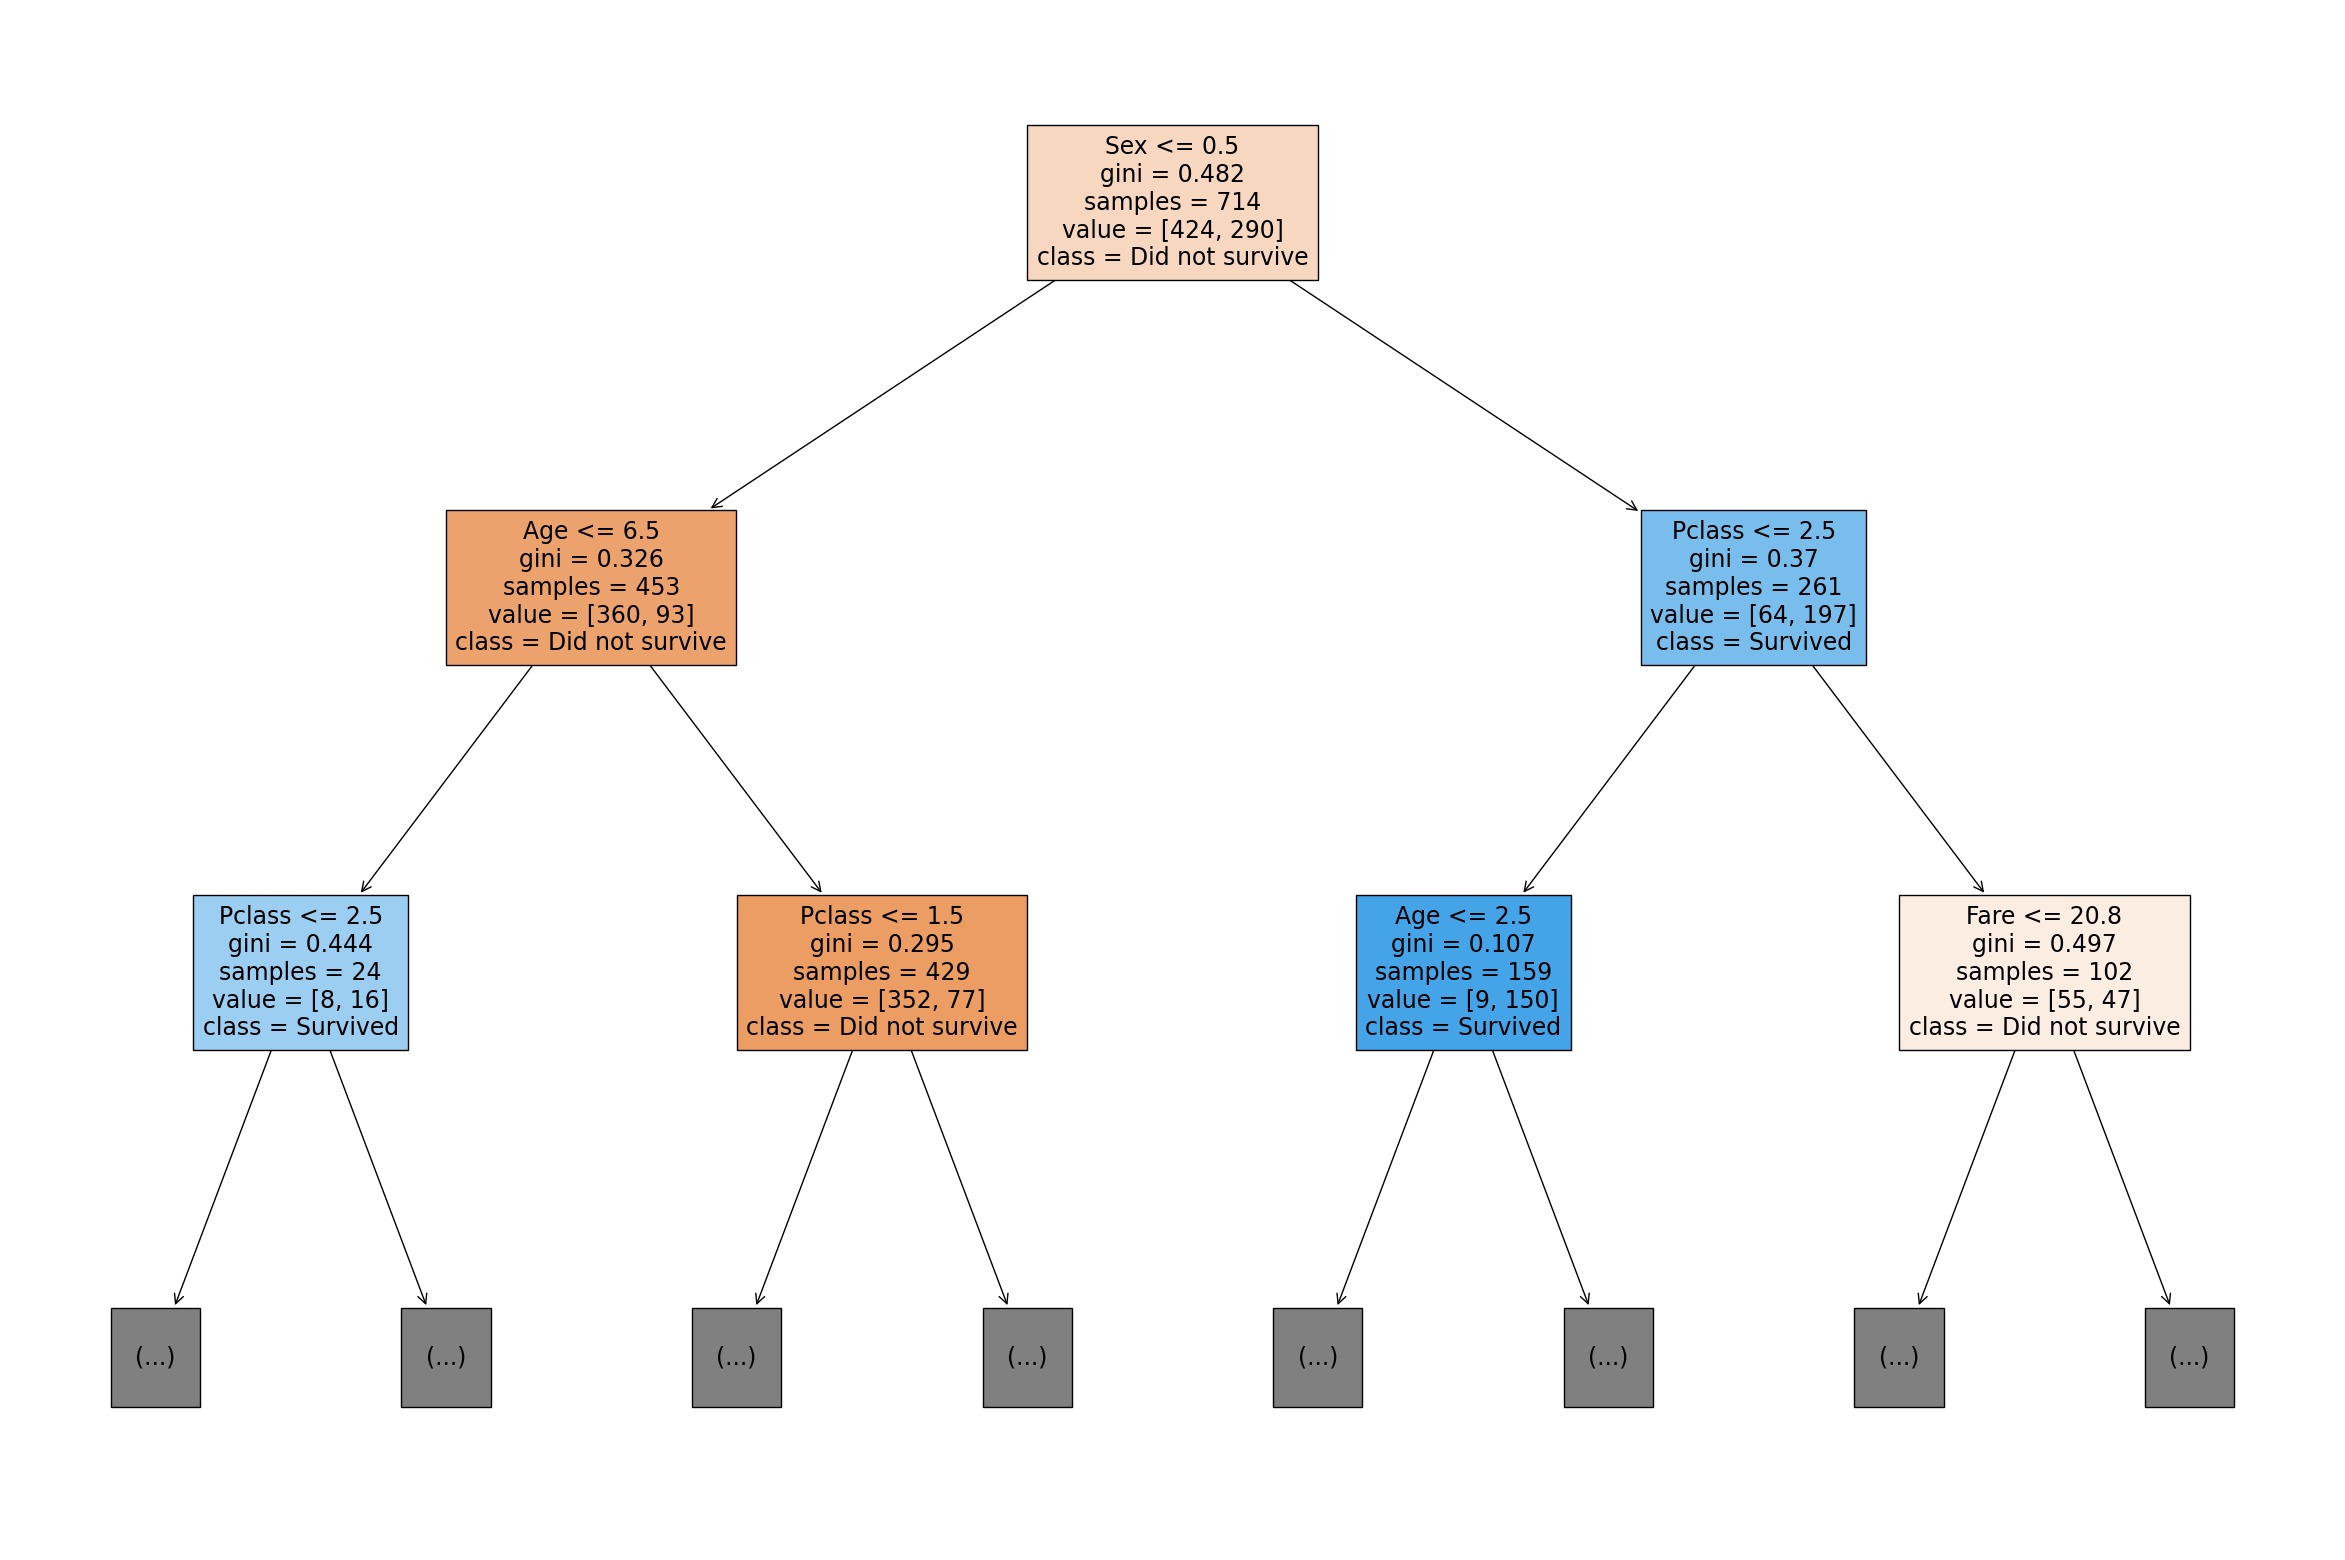

In [4]:
plt.figure(figsize=(30,20))
plot_tree(clf, feature_names=selected_features, filled=True, class_names=['Did not survive', 'Survived'], max_depth=2)
plt.show()

In [5]:
export_graphviz(clf, out_file='tree.dot', feature_names=selected_features, class_names=['Did not survive', 'Survived'], filled=True, rounded=True, special_characters=True)

In [6]:
dot_data = export_graphviz(clf, out_file=None, feature_names=selected_features, class_names=['Did not survive', 'Survived'], filled=True, rounded=True, special_characters=True)